# Snooze Clustering - Sleep Cluster Analysis

### Billie Kim
### Casey Ng
### Ethan Panal

Data Source: https://www.kaggle.com/datasets/kapturovalexander/sleep-patterns

## Contents
1. [Objective of the Proposed Research](#1.-Objective-of-the-Proposed-Research)
2. [Data Exploration](#2.-Data-Exploration)
3. [Data Cleaning](#3.-Data-Cleaning)
4. [Adaptation](#4.-Adaptation)
5. [Descriptive Visualizations](#5.-Descriptive-Visualizations)
6. [Step-by-step Hierarchical Clustering](#6.-Step-by-step-Hierarchical-Clustering)
7. [Dendrogram](#7.-Dendrogram)
8. [Step-by-step K-means](#8.-Step-by-step-K-means)
9. [sklearn.cluster](#9.-sklearn.cluster)
10. [kNN Function](#10.-kNN-Function)
11. [Project Report](#11.-Project-Report)
12. [Originality](#12.-Originality)
13. [References](#13.-References)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mc
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# Load data
# df = pd.read_csv('/content/drive/MyDrive/AC Project 2/sleep75.csv')
df = pd.read_csv('/content/sleep75.csv')

df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.530000,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


# Exploratory Data Analysis

## 1. Objective of the Proposed Research

**Stakeholders:** Medical professionals and/or health and wellness coaches

**Objective:** While this dataset was originally used for economic research by university researchers to study the effects of the labor market on sleep, the findings from studying sleep data can further be used by medical professionals and/or health and wellness coaches to understand factors that contribute to better sleep for their patients and clients. For example, medical providers may want to know more about their patients' work and family circumstances that may help them provide tailored advice about their sleep performance. Some factors that may contribute to an individual's sleep performance are analyzed in this report and include one's:
* age
* education
* income
* marital status
* gender
* weekly work time

Providers often take a medical perspective lens when trying to find and treat a physical illness based on symptoms. By understanding a patients life circumstances, a medical provider may be able to offer more tailored solutions based on which type of cluster or profile a patient falls under. For example,instead of just prescribing patients medicine to treat poor sleep, they may take a whole health approach and refer a patient to a sleep coach to find solutions that work with their individual lifestyle.

**Dataset:** This dataset originally comes a 1990 sleep study, *Sleep and the Allocation of Time*, by Jeff Biddle and Daniel Hamermesh from Michigan State University. Jeff Biddle later released the dataset to the public. The dataset contains characteristics of a sleep study individual such as their age, gender, employment, and health information and combines continuous sleep metrics like their minutes of sleep at night per week and minutes worked in their main job.

## 2. Data Exploration

In [ ]:
# Display head
df.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.530000,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


**Comment:** Looking at the first few rows, all the values look numerical but may either be discrete or continuous.

In [ ]:
# Display shape
df.shape

(706, 34)

**Comment:** We have 706 datapoints representing an individual and 34 features of the individual.

In [ ]:
# Show info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       706 non-null    int64  
 1   black     706 non-null    int64  
 2   case      706 non-null    int64  
 3   clerical  706 non-null    float64
 4   construc  706 non-null    float64
 5   educ      706 non-null    int64  
 6   earns74   706 non-null    int64  
 7   gdhlth    706 non-null    int64  
 8   inlf      706 non-null    int64  
 9   leis1     706 non-null    int64  
 10  leis2     706 non-null    int64  
 11  leis3     706 non-null    int64  
 12  smsa      706 non-null    int64  
 13  lhrwage   532 non-null    float64
 14  lothinc   706 non-null    float64
 15  male      706 non-null    int64  
 16  marr      706 non-null    int64  
 17  prot      706 non-null    int64  
 18  rlxall    706 non-null    int64  
 19  selfe     706 non-null    int64  
 20  sleep     706 non-null    int64 

**Comment:** Only two columns appear to have null values, so our dataset may be relatively clean. Continuous values are stored as floats while binary values are stored as integers.

In [ ]:
# Show describe
df.describe()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,...,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,532.000000,706.000000
mean,38.815864,0.049575,353.500000,0.182331,0.030075,12.780453,9767.705382,0.890935,0.753541,4690.723796,...,0.480170,2122.920680,0.218130,2093.252125,29.668555,20.035411,0.128895,11.769122,5.082839,1635.144476
std,11.342637,0.217219,203.948932,0.335413,0.148366,2.784702,9323.588151,0.311942,0.431254,908.049561,...,0.499961,947.470123,0.413269,945.301457,148.834262,12.377520,0.335321,11.591227,3.704385,950.102976
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1745.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,177.250000,0.000000,0.000000,12.000000,2500.000000,1.000000,1.000000,4109.750000,...,0.000000,1553.500000,0.000000,1538.000000,0.000000,10.000000,0.000000,0.000000,2.890002,841.000000
50%,36.000000,0.000000,353.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.000000,4620.000000,...,0.000000,2288.000000,0.000000,2275.000000,0.000000,17.000000,0.000000,9.000000,4.380000,1296.000000
75%,48.000000,0.000000,529.750000,0.182331,0.030075,16.000000,13750.000000,1.000000,1.000000,5203.750000,...,1.000000,2691.750000,0.000000,2635.500000,0.000000,30.000000,0.000000,20.000000,6.210001,2304.000000
max,65.000000,1.000000,706.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.000000,7417.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509990,4225.000000


**Comment:** Some information learned from looking at description information:
* The mean age of the sleep study participants is 38
* The mean total working time is 2,212 minutes a week. This comes to about 36.9 hours a week which is close to the typical 40 hour work week standard.
* The mean years of schooling is almost 13 years
* The mean years of experience is 20 years.
* The mean years of married is almost 12 years.

In short, the average sleep study participant is approaching 40 years of age, married, and is at the middle to mid-senior point in their career.

In [ ]:
# find correlations between columns
corr = df.corr()
corr.head() # only show a few for report

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
age,1.000000,-0.063647,0.070381,-0.011861,0.018473,-0.265831,0.070692,-0.101095,-7.685537e-02,0.007492,...,-0.087939,-0.049570,-0.036506,-0.052141,0.015605,0.976197,-0.319698,0.593915,0.101466,0.992159
black,-0.063647,1.000000,0.057520,0.098843,0.008273,-0.026535,-0.072047,-0.024758,9.479743e-03,0.042153,...,0.041718,-0.027707,0.021575,-0.022207,-0.035336,-0.052356,0.028990,-0.041643,-0.035258,-0.065761
case,0.070381,0.057520,1.000000,0.135018,0.000937,-0.030903,-0.076664,0.007792,-7.464261e-01,0.286384,...,-0.052729,-0.318562,-0.008414,-0.312264,-0.044643,0.071449,-0.050929,0.107309,-0.165320,0.075802
clerical,-0.011861,0.098843,0.135018,1.000000,-0.083153,0.007704,-0.047980,0.015213,-2.223461e-07,0.129078,...,0.102599,-0.146260,-0.085268,-0.137812,-0.055789,-0.012603,-0.084180,0.001773,-0.163671,-0.009183
construc,0.018473,0.008273,0.000937,-0.083153,1.000000,-0.053898,-0.038979,-0.005070,5.463707e-07,-0.028667,...,-0.045721,0.008136,0.011132,-0.000347,0.053999,0.029055,-0.007289,-0.018003,0.012890,0.016845


**Comment:** Out of the few selected columns, there are not many strong correlations however *age* is 0.97 positively correlated with *experience* and also 0.593915 positive correlated with *years married*.

## 3. Data Cleaning

In [ ]:
# column selection
cols = ['age', 'educ', 'gdhlth', 'male', 'marr', 'slpnaps', 'spsepay', 'totwrk', 'union', 'yngkid']
df_sub = df[cols]
df_sub

,age,educ,gdhlth,male,marr,slpnaps,spsepay,totwrk,union,yngkid
0,32,12,0,1,1,3163,0,3438,0,0
1,31,14,1,1,0,2920,0,5020,0,0
2,44,17,1,1,1,2760,20000,2815,0,0
3,30,12,1,0,1,3083,5000,3786,0,0
4,64,14,1,1,1,3493,2400,2580,0,0
...,...,...,...,...,...,...,...,...,...,...
701,45,12,1,0,1,3385,16000,2026,0,0
702,34,10,0,1,1,3535,0,675,1,0
703,37,12,1,0,1,3510,12000,1851,0,0
704,54,17,1,0,1,3000,35000,1961,1,0


**Comment:** Above, we select a few columns that may give the most valuable insights using domain knowledge and remove columns that were highly correlated.

## 4. Adaptation

In [ ]:
# calculating how much non-sleep related relaxation and leisure time the individual spends, per week
df_sub['relax_time'] = df['rlxall'] - df['slpnaps']

# creating indicator field for whether or not indivual has a 2nd job
df_sub['has_second_job'] = (df['workscnd'] > 0).astype(int)

df_sub

,age,educ,gdhlth,male,marr,slpnaps,spsepay,totwrk,union,yngkid,relax_time,has_second_job
0,32,12,0,1,1,3163,0,3438,0,0,0,0
1,31,14,1,1,0,2920,0,5020,0,0,0,0
2,44,17,1,1,1,2760,20000,2815,0,0,278,0
3,30,12,1,0,1,3083,5000,3786,0,0,0,0
4,64,14,1,1,1,3493,2400,2580,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,12,1,0,1,3385,16000,2026,0,0,25,0
702,34,10,0,1,1,3535,0,675,1,0,0,1
703,37,12,1,0,1,3510,12000,1851,0,0,135,0
704,54,17,1,0,1,3000,35000,1961,1,0,88,1


**Comment:** Two new columns are created, one is a continuous variable to measure an individual's relax time rather than a composite of leisure and nap time. The other variable is a discrete variable to easily distinguish if an individual works a second job.

# Visualization

## 5. Descriptive Visualization

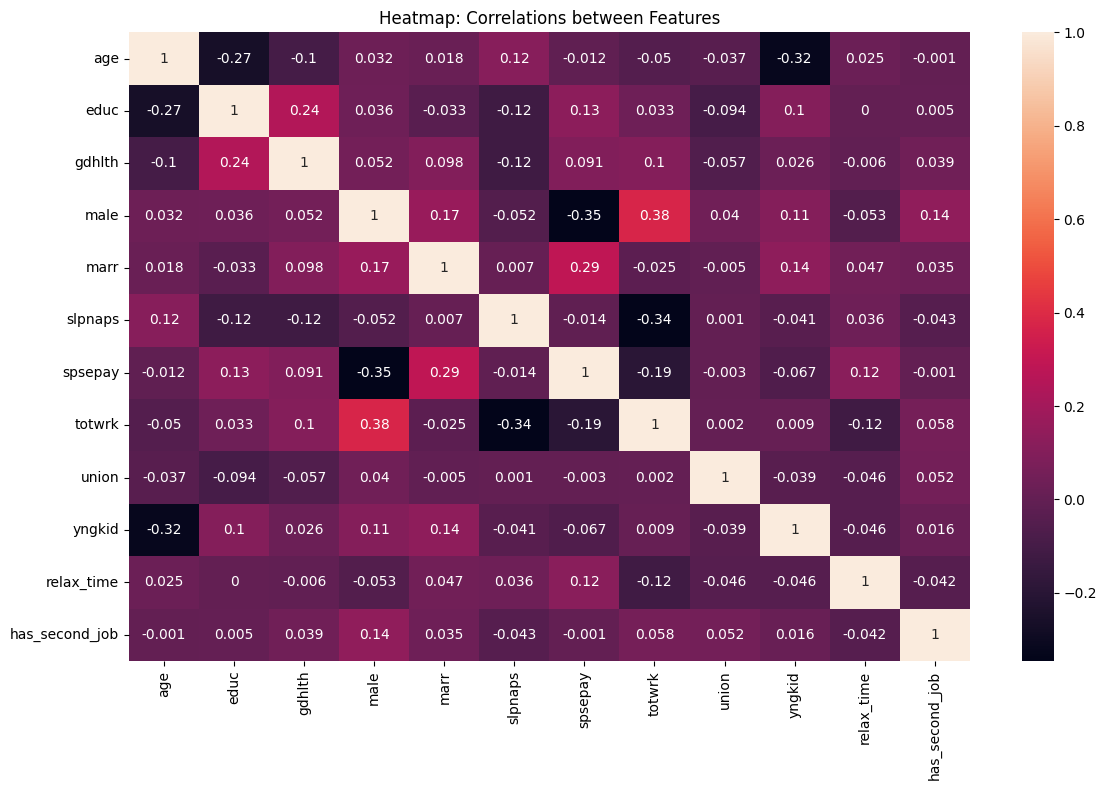

In [ ]:
# plot of correlations
plt.figure(figsize=(12,8))
plt.title('Heatmap: Correlations between Features')
sns.heatmap(round(df_sub.corr(),3), annot=True)
plt.tight_layout();

**Comment:** Among the most correlated variables:
* Being male is 0.38 postively correlated with total work time
* Being male is 0.35 negatively correlated with having spouse pay
* Total work time is 0.34 negatively correlated with sleep/naps

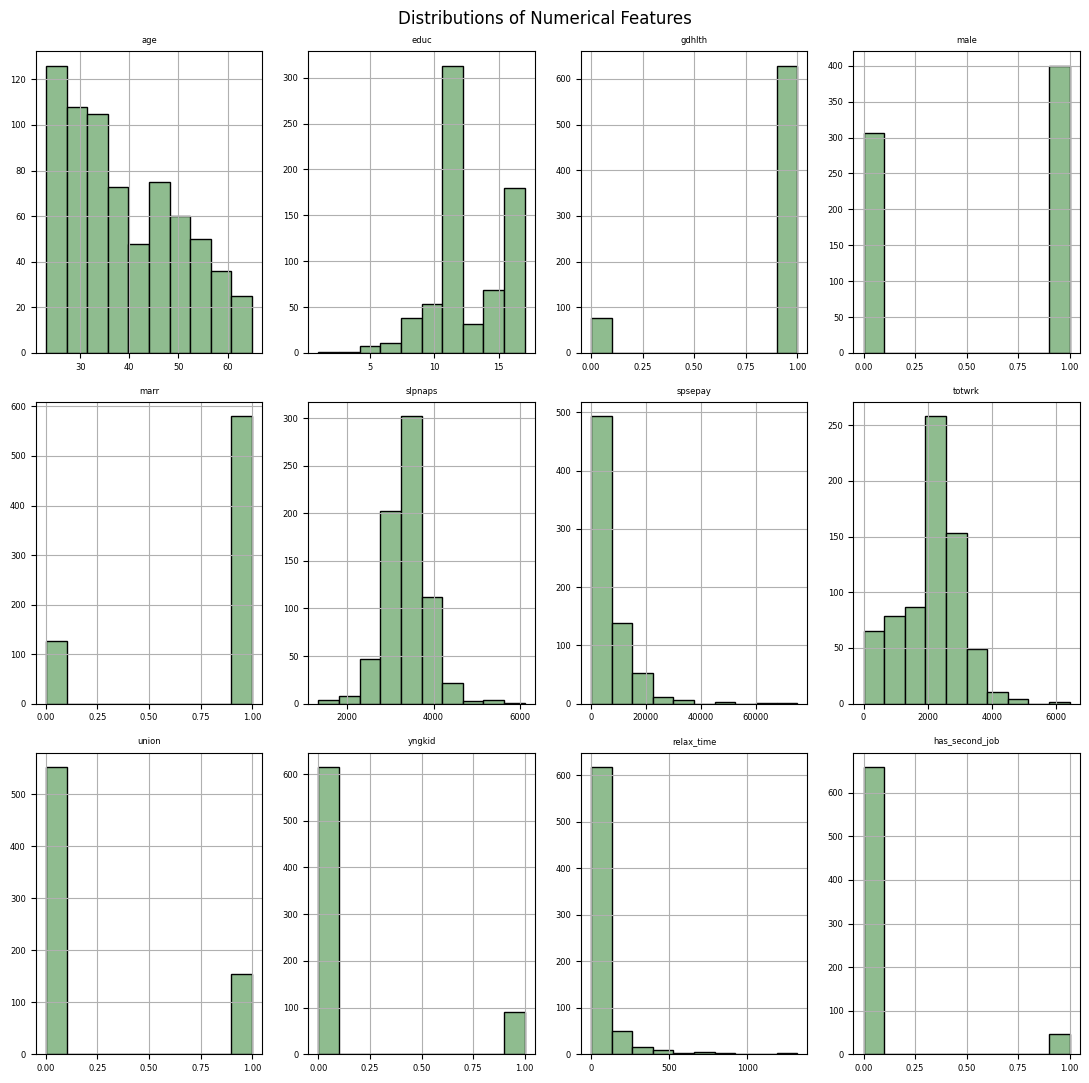

In [ ]:
# Display histograms of all the numerical columns
fig, axs = plt.subplots(3, 4, figsize=(11, 11))
fig.suptitle('Distributions of Numerical Features')
for ax, col in zip(axs.flatten(), df_sub.columns):
    df_sub.hist(column=col, ax=ax, xlabelsize = 6, ylabelsize=6, color="darkseagreen", edgecolor='black')
    ax.title.set_size(6)
plt.tight_layout();

**Comment:**  The distribution of variables can be seen above. Many sleep participants are under 40 years old, have about 10 years of education, and are in good health.

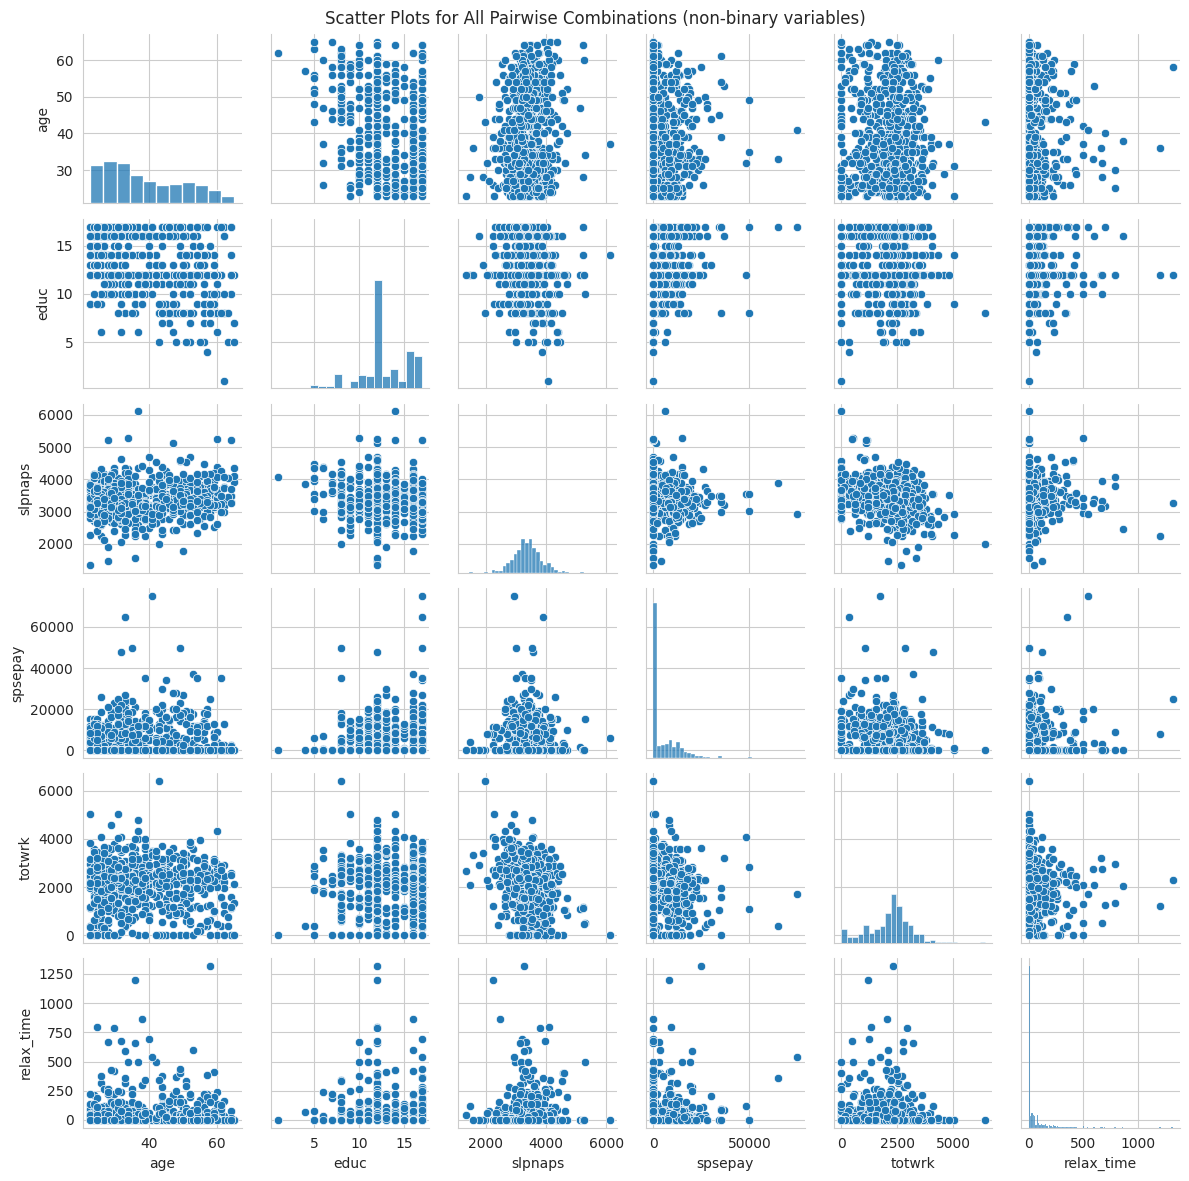

In [ ]:
# scatter plots for all pairwise combinations (for non-binary variables)
sns.set_style('whitegrid')
nb_cols = ['age', 'educ', 'slpnaps', 'spsepay', 'totwrk', 'relax_time']
plots = sns.pairplot(df_sub[nb_cols], height = 2)
plots.fig.suptitle('Scatter Plots for All Pairwise Combinations (non-binary variables)')
plt.tight_layout();

**Comment:** Scatterplots of the variables can be seen above. As mentioned earlier, the strongest correlation is between total working time and sleep/naps.

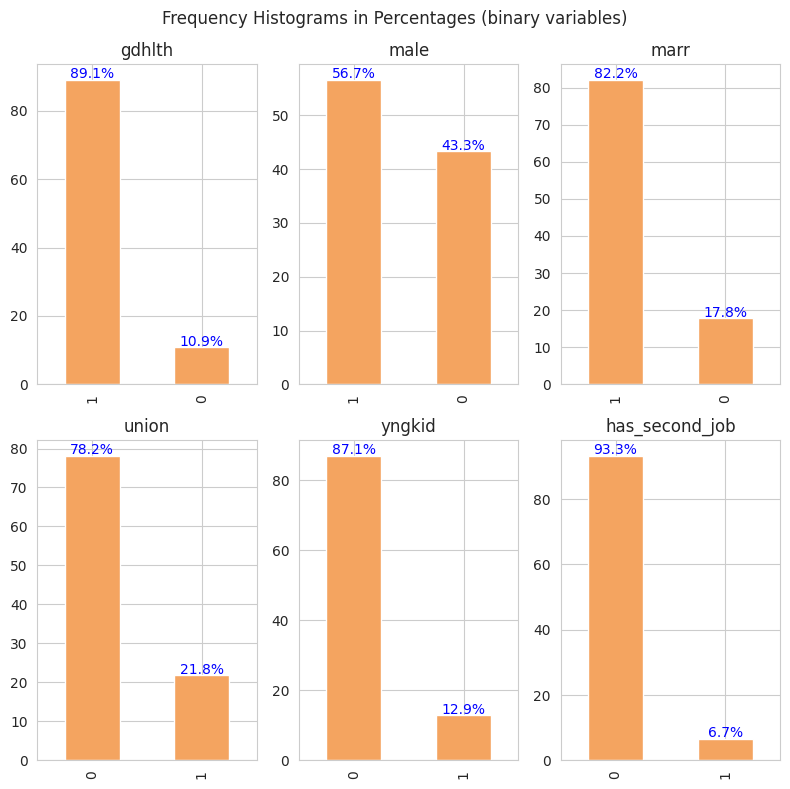

In [ ]:
# This section modifies code from DataQuest to normalize the binary variables and plot them.
b_cols = ['gdhlth','male','marr','union','yngkid','has_second_job']
fig, axs = plt.subplots(2, 3, figsize=(8, 8))
plt.suptitle('Frequency Histograms in Percentages (binary variables)')
for ax, col in zip(axs.flatten(), b_cols):
    ax.title.set_text(col)
    df_sub[col].value_counts(normalize=True).mul(100).plot.bar(ax=ax,color = "sandybrown")
    for p in ax.patches:
        y = p.get_height()
        x = p.get_x() + p.get_width() / 2

        # Label of bar height
        label = "{:.1f}%".format(y)

        # Annotate plot
        ax.annotate(
            label,
            xy=(x, y),
            xytext=(0, 1),
            textcoords="offset points",
            ha="center",
            fontsize=10,
            color='blue'
        )

plt.tight_layout();

**Comment:** For the binary variables, the normalize value counts are plotted. Most participants are married, have one job, no young kid, in a union, and in good health.

# Cluster Analysis

## 6. Step-by-step Hierarchical Clustering

In [ ]:
# Scaling the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df_sub))

X

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.601333,-0.280463,-2.858117,0.874643,0.466092,-0.441320,-0.624213,1.388974,-0.528191,-0.384665,-0.422201,-0.267058
1,-0.689558,0.438256,0.349881,0.874643,-2.145501,-0.928594,-0.624213,3.059868,-0.528191,-0.384665,-0.422201,-0.267058
2,0.457373,1.516334,0.349881,0.874643,0.466092,-1.249432,1.802660,0.730968,-0.528191,-0.384665,1.703677,-0.267058
3,-0.777783,-0.280463,0.349881,-1.143324,0.466092,-0.601740,-0.017495,1.756529,-0.528191,-0.384665,-0.422201,-0.267058
4,2.221881,0.438256,0.349881,0.874643,0.466092,0.220409,-0.332989,0.482763,-0.528191,-0.384665,-0.422201,-0.267058
...,...,...,...,...,...,...,...,...,...,...,...,...
701,0.545598,-0.280463,0.349881,-1.143324,0.466092,0.003843,1.317285,-0.102367,-0.528191,-0.384665,-0.231025,-0.267058
702,-0.424882,-0.999182,-2.858117,0.874643,0.466092,0.304629,-0.624213,-1.529280,1.893255,-0.384665,-0.422201,3.744500
703,-0.160205,-0.280463,0.349881,-1.143324,0.466092,0.254498,0.831911,-0.287200,-0.528191,-0.384665,0.610150,-0.267058
704,1.339627,1.516334,0.349881,-1.143324,0.466092,-0.768175,3.622815,-0.171019,1.893255,-0.384665,0.250739,3.744500


In [ ]:
# Creating a matrix of distances between observations
dist_df = pd.DataFrame(euclidean_distances(X))
dist_df

,0,1,2,3,4,5,6,7,8,9,...,696,697,698,699,700,701,702,703,704,705
0,0.000000,4.545913,5.112306,3.863096,4.485784,5.995264,5.002949,3.515612,4.917086,3.521248,...,4.257503,5.307349,3.069528,4.654338,4.982211,4.680504,5.619283,4.586698,8.021580,5.187630
1,4.545913,0.000000,5.023336,3.686540,4.831499,6.770210,5.576743,3.353598,5.089987,3.603171,...,4.473848,6.119736,5.962903,4.668911,3.576435,5.254513,7.986555,5.241945,8.190416,5.402195
2,5.112306,5.023336,0.000000,4.257920,3.946915,6.298948,4.817651,3.544224,3.833022,3.180925,...,3.962927,5.506840,5.556019,3.120166,4.596096,3.681339,7.568774,3.621974,5.768513,5.195694
3,3.863096,3.686540,4.257920,0.000000,3.998084,5.734704,4.375158,2.632991,4.415093,2.500690,...,2.292541,4.071126,4.211084,4.165453,3.434673,2.718777,6.996191,2.660566,6.864091,3.747351
4,4.485784,4.831499,3.946915,3.998084,0.000000,4.929169,4.239484,2.158796,4.302755,3.134421,...,3.429864,4.121442,4.285017,1.805416,4.521051,3.247753,6.742332,3.644150,6.743498,4.759700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,4.680504,5.254513,3.681339,2.718777,3.247753,5.174774,3.842349,3.373720,4.585023,3.073006,...,2.664984,3.351399,3.908982,3.848432,3.818263,0.000000,6.611380,1.240288,5.653605,4.081672
702,5.619283,7.986555,7.568774,6.996191,6.742332,4.307151,6.812411,6.746260,6.269636,6.477188,...,6.703051,5.714488,5.669509,7.143695,7.222590,6.611380,0.000000,6.452702,6.729831,7.296276
703,4.586698,5.241945,3.621974,2.660566,3.644150,5.023761,3.809691,3.496001,4.057283,2.966061,...,2.533767,3.370946,3.957977,3.979590,3.520409,1.240288,6.452702,0.000000,6.034207,3.855983
704,8.021580,8.190416,5.768513,6.864091,6.743498,6.187076,7.202690,7.052364,6.633329,6.697854,...,6.573699,6.485184,7.544510,6.721475,7.139169,5.653605,6.729831,6.034207,0.000000,7.405246


## 7. Dendrogram

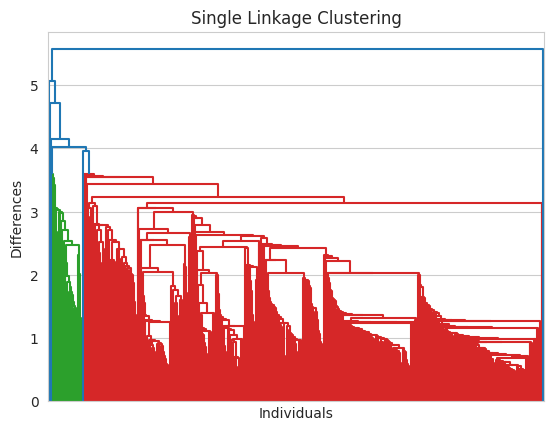

In [ ]:
# creating a dendrogram using single linkage
# code adapted from the zybooks notes
singleModel = linkage(X, method='single')
dendrogram(singleModel, no_labels=True)

plt.ylabel('Differences')
plt.xlabel('Individuals')
plt.title('Single Linkage Clustering')
plt.show()

**Comment:** This type of linkage uses the minimum distance between datapoints in each cluster. The produced dendrogram shows 2 apparent clusters.

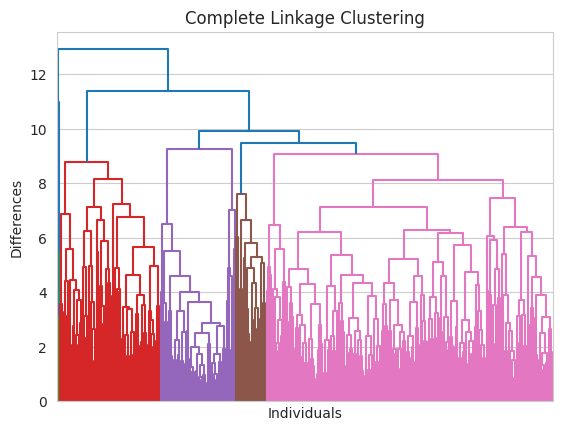

In [ ]:
# creating a dendrogram using complete linkage
# code adapted from the zybooks notes

completeModel = linkage(X, method='complete')
dendrogram(completeModel, color_threshold=9.3, no_labels=True)

plt.ylabel('Differences')
plt.xlabel('Individuals')
plt.title('Complete Linkage Clustering')
plt.show()

**Comment:** This type of linkage uses the maximum distance between datapoints in each cluster. The produced dendrogram shows 4 apparent clusters.

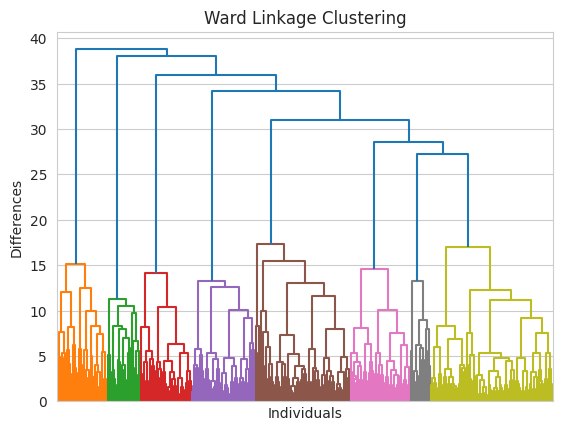

In [ ]:
# creating a dendrogram using ward linkage
# code adapted from the zybooks notes
wardModel = linkage(X, method='ward')
dendrogram(wardModel, no_labels=True)

plt.ylabel('Differences')
plt.xlabel('Individuals')
plt.title('Ward Linkage Clustering')
plt.show()

**Comment:** This type of linkage minimizes the variance in each cluster. The produced dendrogram shows 8 apparent clusters. Overall, ward linkage produces the best looking clusters. The previous 2 creates very unbalanced clusters.

## sklearn.cluster

In [ ]:
# run agglomerative clustering using sklearn
clusters = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
clabels = clusters.fit_predict(X)

In [ ]:
pd.Series(clabels).value_counts()

2    174
0    135
4     91
6     86
3     73
1     72
5     47
7     28
dtype: int64

# Unsupervised Clustering

## 8. Step-by-step K-means

Below, this step-by-step K-means function is modeled from a Towards Data Science article to calculating K-Means-Clustering using python.

In [ ]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

def kmeans(df, k):
    # Convert the df to numpy array and initialize the centroids randomly
    npdf = df.to_numpy()
    centroids = npdf[np.random.choice(npdf.shape[0], k, replace=False), :]

    # Iterate through 10 times
    for iteration in range(10):
        # Calculate the euclidean distances
        distances = np.linalg.norm(npdf[:, np.newaxis, :] - centroids, axis=2)

        # cluster based on the minimum distance
        clusters = np.argmin(distances, axis=1)

        # update all the centroids based on the new min distances
        newCentroids = np.array([npdf[clusters == i].mean(axis=0) for i in range(k)])

        # Check if the centroids are equal to the newly calculated ones
        if np.array_equal(centroids, newCentroids):
            break
        centroids = newCentroids
    for i in range(len(centroids)):
      print("Centroid", i+1 , centroids[i], "\n")
    return clusters

**Comment:** The kmeans function above loops through 10 times to figure out the center of clusters and returns the cluster type for each row in the data frame. At the end, it also outputs the centroids of each cluster.

In [ ]:
clusters = kmeans(df_sub,8)

Centroid 1 [  37.32   13.11    0.93    0.69    0.63 2955.94   24.9  2552.85    0.14
    0.15   41.68    0.03] 

Centroid 2 [  40.37   12.48    0.86    0.73    0.7  3661.46   12.98 2634.07    0.24
    0.15   49.92    0.08] 

Centroid 3 [   38.59    13.18     0.94     0.17     1.    3381.36 16137.08  1671.47
     0.24     0.1     59.83     0.03] 

Centroid 4 [  45.21   11.      0.69    0.45    0.69 3597.5   242.86  465.05    0.24
    0.14   55.38    0.05] 

Centroid 5 [  35.98   12.87    0.88    0.56    1.   3382.05 7854.89 2105.48    0.25
    0.12   59.81    0.08] 

Centroid 6 [  40.31   13.      0.87    0.53    0.73 3813.21  123.6  1434.13    0.29
    0.13   71.27    0.08] 

Centroid 7 [  38.83   12.34    0.93    0.92    0.97 3249.76 2393.58 2846.73    0.19
    0.1    49.51    0.15] 

Centroid 8 [   44.18    14.45     1.       0.18     1.    3357.09 44909.09  1676.27
     0.09     0.     135.27     0.18] 



**Comment:** The center of the 8 clusters can be seen above. Since there are 12 features, each centroid is a vector with 12 points.

## 9. sklearn.cluster

In [ ]:
# Running kmeans clustering with multiple values of k
# Calculating Within-cluster Sum of Squares for each model
# Some of this code was adapted from the zybooks notes
WCSS = []

for j in range(1, 11):
  kmModel = KMeans(n_clusters=j, random_state=123)
  kmModel = kmModel.fit(X)
  WCSS.append(kmModel.inertia_)

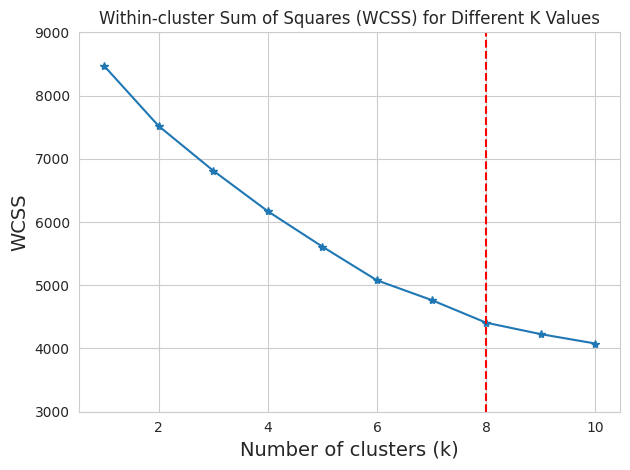

In [ ]:
# Plotting WCSS for each model to find optimal k value using elbow method
# Some of this code was adapted from the zybooks notes
ax = plt.figure().gca()
plt.plot(np.arange(start=1, stop=len(WCSS)+1), WCSS, '*-')
plt.title('Within-cluster Sum of Squares (WCSS) for Different K Values')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.ylim(3000, 9000)
plt.axvline(x=8,color='r',linestyle='--')
plt.tight_layout();

**Comment:** Here, we are looking at the sum of squares error term in each cluster and using the Elbow-Method to select the best number of clusters. We choose k=8 using this method.

In [ ]:
# initializing a kmeans clustering model with 8 clusters
kmModel = KMeans(n_clusters = 8, random_state=143)
# fitting the model
kmModel.fit(X)
# getting cluster labels for the data
clusters = kmModel.fit_predict(X)
# counts for each cluster
pd.Series(clusters).value_counts()

5    177
1    130
6     92
3     88
7     78
0     70
4     47
2     24
dtype: int64

**Comment:** By running K-Means clustering and setting the number of clusters = 8, we successfully created our cluster labels for our data. We can go now forward with finding insights into each cluster. How exciting?!!

## Finding Insights into Clusters

In [ ]:
# fitting a 2 component PCA
pca = PCA(n_components=2)

In [ ]:
pca1, pca2 = zip(*pca.fit_transform(X))

In [ ]:
print('Explained variance ratio:',pca.explained_variance_ratio_)
print('Number of features:',pca.n_features_in_)
print('Number of samples:',pca.n_samples_)
print('PCA direction/loadings:',pca.components_)

Explained variance ratio: [0.15 0.13]
Number of features: 12
Number of samples: 706
PCA direction/loadings: [[ 0.27 -0.24 -0.24 -0.46 -0.03  0.37  0.27 -0.51  0.   -0.26  0.18 -0.16]
 [-0.38  0.45  0.34 -0.28  0.25 -0.11  0.5  -0.2  -0.13  0.24  0.15 -0.05]]


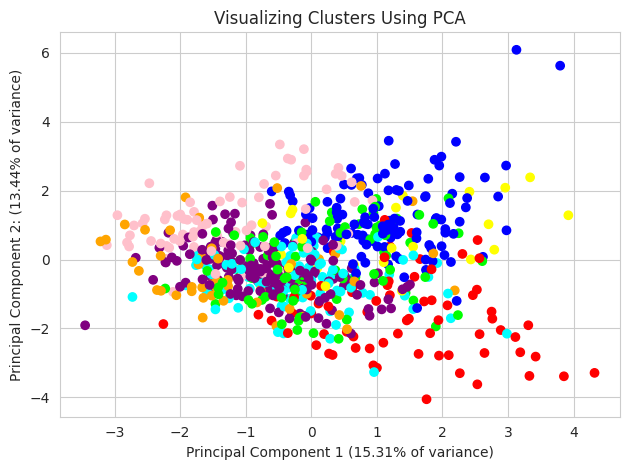

In [ ]:
# Visualizing clusters using 2 principal components
colors = mc.ListedColormap(['red','blue','yellow','lime','orange','purple','cyan','pink'])
plt.scatter(pca1,pca2,c=clusters,cmap=colors)
plt.xlabel('Principal Component 1 (15.31% of variance)')
plt.ylabel('Principal Component 2: (13.44% of variance)')
plt.title('Visualizing Clusters Using PCA')
plt.tight_layout();

**Comment:** In order to visualize our clusters, we used Principle Component Analysis (PCA) to reduce the dimensions of our data. Each cluster is grouped by color.

In [ ]:
# Adding cluster labels to our data set
df_sub['clusters'] = clusters

clust_dfs = []

for i in range(0,8):
    c = df_sub[df_sub['clusters'] == i]
    clust_dfs.append(c)

In [ ]:
# summary statistics for cluster 0
clust_dfs[0].mean()

age                 43.157143
educ                10.671429
gdhlth               0.000000
male                 0.471429
marr                 0.700000
slpnaps           3578.485714
spsepay           2977.142857
totwrk            1847.785714
union                0.271429
yngkid               0.071429
relax_time          44.614286
has_second_job       0.000000
clusters             0.000000
dtype: float64

**Comment:** 100% not in good health, 47% male, 53% female

In [ ]:
# summary statistics for cluster 1
clust_dfs[1].mean()

age                  38.092308
educ                 13.123077
gdhlth                1.000000
male                  0.023077
marr                  1.000000
slpnaps            3454.346154
spsepay           13239.615385
totwrk             1564.738462
union                 0.000000
yngkid                0.000000
relax_time           44.500000
has_second_job        0.000000
clusters              1.000000
dtype: float64

**Comment:** 100% good health, 100% married, 98% female, high spousepay

In [ ]:
# summary statistics for cluster 2
clust_dfs[2].mean()

age                 40.541667
educ                12.625000
gdhlth               0.958333
male                 0.583333
marr                 0.875000
slpnaps           3519.708333
spsepay           5377.625000
totwrk            1761.833333
union                0.125000
yngkid               0.041667
relax_time         602.458333
has_second_job       0.000000
clusters             2.000000
dtype: float64

**Comment:** high relax time, 58% male, 42% female

In [ ]:
# summary statistics for cluster 3
clust_dfs[3].mean()

age                 40.238636
educ                12.431818
gdhlth               1.000000
male                 0.625000
marr                 1.000000
slpnaps           3422.727273
spsepay           6639.386364
totwrk            2113.034091
union                1.000000
yngkid               0.000000
relax_time          27.420455
has_second_job       0.000000
clusters             3.000000
dtype: float64

**Comment:** 100% good health, 100% married, 100% union

In [ ]:
# summary statistics for cluster 4
clust_dfs[4].mean()

age                 38.787234
educ                12.829787
gdhlth               0.936170
male                 0.829787
marr                 0.872340
slpnaps           3303.446809
spsepay           5113.404255
totwrk            2327.127660
union                0.297872
yngkid               0.148936
relax_time          34.744681
has_second_job       1.000000
clusters             4.000000
dtype: float64

**Comment:** 100% second job, 83% male, 17% female

In [ ]:
# summary statistics for cluster 5
clust_dfs[5].mean()

age                 41.604520
educ                12.853107
gdhlth               1.000000
male                 0.960452
marr                 1.000000
slpnaps           3294.926554
spsepay           2625.033898
totwrk            2538.265537
union                0.000000
yngkid               0.000000
relax_time          36.305085
has_second_job       0.000000
clusters             5.000000
dtype: float64

**Comment:** 100% good health, 100% married

In [ ]:
# summary statistics for cluster 6
clust_dfs[6].mean()

age                 37.532609
educ                13.304348
gdhlth               1.000000
male                 0.369565
marr                 0.000000
slpnaps           3308.152174
spsepay              0.000000
totwrk            2262.663043
union                0.206522
yngkid               0.000000
relax_time          31.315217
has_second_job       0.000000
clusters             6.000000
dtype: float64

**Comment:** 100% good health, 100% single

In [ ]:
# summary statistics for cluster 7
clust_dfs[7].mean()

age                 29.192308
educ                13.730769
gdhlth               0.961538
male                 0.666667
marr                 0.948718
slpnaps           3338.602564
spsepay           3640.384615
totwrk            2192.012821
union                0.141026
yngkid               1.000000
relax_time          28.961538
has_second_job       0.000000
clusters             7.000000
dtype: float64

**Comment:** 100% has kids, low age group

# Supervised Clustering

## 10. kNN Function

In [ ]:
# Some of this code was adapted from the zybooks notes
# KNN predictor function
def predictKNN(k, dp, df):

  # input data
  X = df.iloc[:,:-1]
  # labels
  y = df.iloc[:,-1:]
  # initializing KNN classifier
  KNNClassifier = KNeighborsClassifier(n_neighbors=k)
  # scaling the data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X)

  # training the model
  KNNClassifier.fit(X_train_scaled, np.ravel(y))
  # return predicted label(s)
  return KNNClassifier.predict(scaler.transform(dp))

**Comment:** Our KNN function to predict a class label for a vector of observations.

In [ ]:
sample1 = df_sub.iloc[:,:-1].min(axis=0).values.reshape(1,-1)
predictKNN(8, sample1, df_sub)

array([0], dtype=int32)

**Comment:** Using all the minimum values for each feature in our data set, we use our KNN function with 8 clusters to predict the class label. The function predicts class 0.

In [ ]:
sample2 = df_sub.iloc[:,:-1].max(axis=0).values.reshape(1,-1)
predictKNN(8, sample2, df_sub)

array([2], dtype=int32)

**Comment:** Using all the maximum values for each feature in our data set, we use our KNN function with 8 clusters to predict the class label. The function predicts class 2.

In [ ]:
sample3 = df_sub.iloc[:,:-1].median(axis=0).values.reshape(1,-1)
predictKNN(8, sample3, df_sub)

array([5], dtype=int32)

**Comment:** Using all the median values for each feature in our data set, we use our KNN function with 8 clusters to predict the class label. The function predicts class 5.

In [ ]:
sample4 = df_sub.iloc[:,:-1].sample(5, random_state=0)
predictKNN(8, sample4, df_sub)

array([5, 4, 6, 0, 5], dtype=int32)

**Comment:** Using 5 random rows from our data set, we use our KNN function with 8 clusters to predict the class labels. The function predicts classes 5, 4, 6, 0 and 5, respectively.

In [ ]:
sample5 = df_sub.iloc[:,:-1].sample(5, random_state=0)
predictKNN(4, sample5, df_sub)

array([5, 4, 6, 0, 5], dtype=int32)

**Comment:** Using 5 random rows from our data set, we use our KNN function with 4 clusters to predict the class labels. The function predicts classes 5, 4, 6, 0 and 5, respectively, the same predictions as k = 8.

## KNN Classifier Results

In [ ]:
# Creating a KNN classifier with 8 neighbors
KNNClassifier = KNeighborsClassifier(n_neighbors=8)
# Creating train_test_splits
X_train, X_test, y_train, y_test = train_test_split(df_sub.iloc[:,:-1], clusters, test_size=0.2, random_state=123)

In [ ]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Training the KNN Classifier
KNNClassifier.fit(X_train_scaled, y_train)
y_pred = KNNClassifier.predict(scaler.transform(X_test))

Accuracy Score: 0.9788732394366197


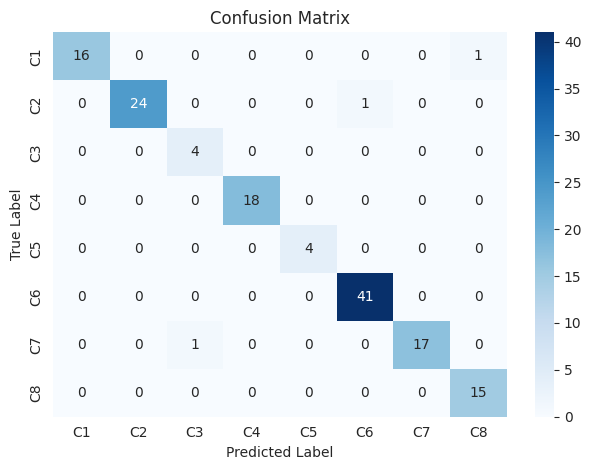

In [ ]:
# Accuracy score and confusion matrix
print("Accuracy Score: " + str(accuracy_score(y_pred,y_test)))

labels = ['C1','C2','C3','C4','C5','C6','C7','C8']
cm= confusion_matrix(y_pred,y_test)
cmat = sns.heatmap(cm,annot=True,cmap='Blues')
cmat.set_title('Confusion Matrix')
cmat.set_xlabel('Predicted Label'); cmat.set_ylabel('True Label')
cmat.xaxis.set_ticklabels(labels); cmat.yaxis.set_ticklabels(labels)
plt.tight_layout();

**Comment:** The KNN classifier achieved a high accuracy score of 97.89%. In the confusion matrix, there are only a few incorrect predictions which is what we'd like to see.

# Findings

## 11. Project Report



Problems in sleeping habits can offset a person's life drastically. If left untreated, the unforseen consequences can be a gateway into more serious issues that can impact an individual's livelihood and even their overall health in general. This report is to provide medical professionals with insights into patients' work and family circumstances that may contribute to sleep performance as well as to aim to build patient profiles using cluster analysis whereas medical professionals can curate tailored treatments for patients belonging to a certain group.

**Dataset:** We obtained our dataset from Kaggle that contained information about sleep patterns of individuals. Originally, the data was used to create economic models in 1990 by Jeff Biddle and Daniel Hamermesh; however, we will use the data to cluster patient profiles. There are a total of 706 records which represents individuals and 34 features that are indicators of health, gender, employment, and sleeping metrics.

**Data Cleaning:**
In the data cleaning phase, we noticed that the data was relatively clean. We did notice that there was a redundancy of features that needed to be addressed. In total, we removed 24 fields and truncated our dataset for analysis to the following features: age, education, goodhealth, male, married, sleepnaps, spousepay, totalwork, union, and youngkid. The column removal process was completed after conducting a feature correlation analysis. We found that highly correlated columns were just transformed features of themselves such as hourly_wage and lhr_wage which is just the logarithm of the former. Another example is the feature age and age_squared which is just the squared age of an individual.

**Data Wrangling:** We also created and transformed two new features relax_time and has_second_job from fields that were previously removed. Relax_time measures an individual's relax time while has_second_job indicates whether an individual has a second employment.

**Visualizations:** We created visualizations based on the datatype of variables. For numerical features, we created histograms that displayed distributions. We found that age and relax_time are right-skewed, education is bimodal, while sleep duration is normally distributed. Although there are many of the sleep participants that are under 40 years of age, the mean age group for this dataset was found to be 38 years of age. For binary variables, we created frequency plots that shows counts as percentages. We found that there are slightly more male than female participants. Also, most participants are married, have a single job, in a union, with no kids and in good health.


**Hierarchical Clustering:**
We used several linkage methods to produce dendrograms: single, complete, and ward. Overall, we found that the ward linkage method which minimizes the variance in clusters produced the most balanced result. We were able to identify 8 distinct clusters (**Figure 1**). We ran an agglomerative clustering algorithm to produce cluster labels for the data.

**K-Means Clustering:**
We ran K-Means for different values of k (number of clusters) and plotted the inertias which are the sum-of-squares error within clusters. We then used the Elbow Method to find the best value of k which was 8 clusters. We then created a K-Means clustering model with 8 clusters which created cluster labels for the data.

**Hierarchical vs. K-Means** Hierarchical and K-Means Clustering produced similar value counts for cluster labels. Moving forward, we chose to use the cluster labels from K-Means since K-Means is simpler and faster while Hierarchical is known to be computationally expensive.

**Finding Insights into Clusters:**
We used Principle Component Analysis to reduced the dimensionality into 2 dimensions which allowed us to visually see each cluster in a 2D coordinate plane (**Figure 2**). We then calculated summary statistics of each cluster using the mean and found the following characteristics of cluster members:
- cluster 1: Members are 100% not in good health and there are approximately half males and half females
- cluster 2: Members are 100% in good health, 100% married, predominately female, and have very high spouse pay
- cluster 3: Members have high relax time and there are slightly more male than female
- cluster 4: Members are 100% in good health, 100% married, and 100% in unions
- cluster 5: Members are predominately male and 100% have a second job
- cluster 6: Members are 100% in good health and 100% married
- cluster 7: Members are 100% in good health and 100% single
- cluster 8: Members are younger than the mean age and 100% have kids

**Recommendations** Going forward, we'd like to recommend to Medical Professionals to examine the clusters that we have found and create tailored treatment plans for each cluster/group based on their characteristics. We do hope that in the future we could explore more ways to find insights into each cluster. In addition, now that we have our clusters, if new data presents itself in the future, we built a KNN classifier that could predict the class of new patients with an accuracy of 97.89%.

## Figure 1: Ward Linkage Clustering

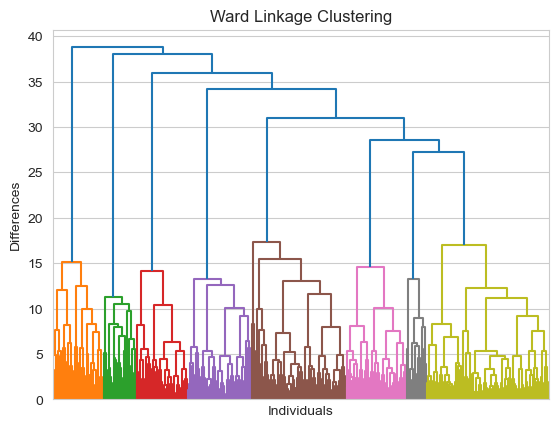

## Figure 2: Visualizing Clusters using PCA

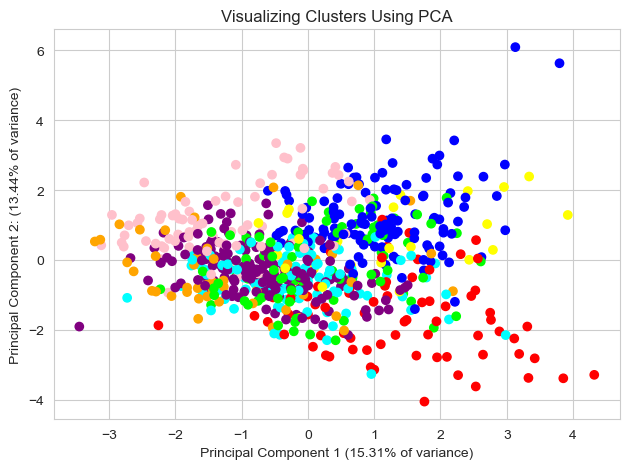

## 12. Originality

As stated earlier, this dataset originally comes from a 1990 sleep study, *Sleep and the Allocation of Time*, by Jeff Biddle and Daniel Hamermesh from Michigan State University. Jeff Biddle later released the dataset to the public. While the focus on that study was from an economic research perspective to identify correlations between labor market variables and sleep, this project's main purpose is to analyze those labor market variables using clustering analysis. In addition, this project uses Python to achieve that analysis, while the programming tool of the sleep study is not known. No other similar published works for clustering analysis using Python was found with this dataset.

## 13. References

1. Dataquest. (2023, March 6). Step-by-step guide on how to make your plots appealing in Python. https://www.dataquest.io/blog/how-to-make-your-plots-appealing-in-python/
2. Biddle, J. E., &amp; Hamermesh, D. S. (1990, October). Sleep and the allocation of time - JSTOR. Sleep and the Allocation of Time. https://www.jstor.org/stable/2937618
3. Kapturov, A. (2023, October 17). 🛌 sleep patterns. Kaggle. https://www.kaggle.com/datasets/kapturovalexander/sleep-patterns/
4. https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670